# Feature Detection

Objective: Detect key points in images using OpenCV.
Analogy: Finding landmarks in a city map to navigate efficiently.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('Parrot.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

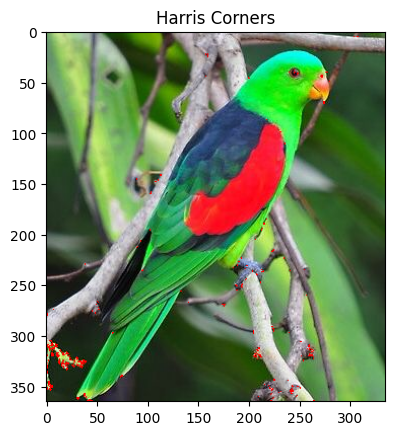

In [ ]:
gray_float = np.float32(gray)
corners = cv2.cornerHarris(gray_float, 2, 3, 0.04)
img_harris = img.copy()
img_harris[corners>0.01*corners.max()] = [0,0,255]
plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.show()

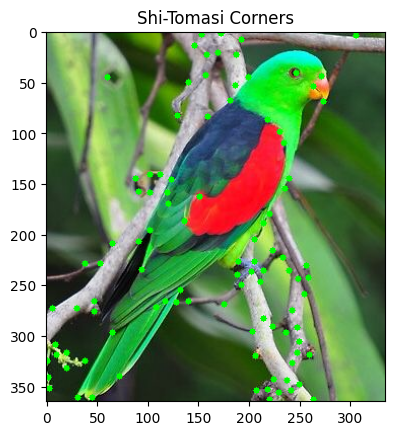

In [ ]:
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = corners.astype(int)
img_shi = img.copy()
for i in corners:
    x, y = i.ravel()
    cv2.circle(img_shi, (x, y), 3, (0,255,0), -1)
plt.imshow(cv2.cvtColor(img_shi, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corners')
plt.show()

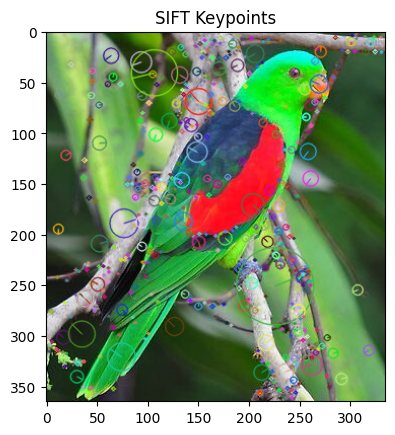

In [ ]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)
img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

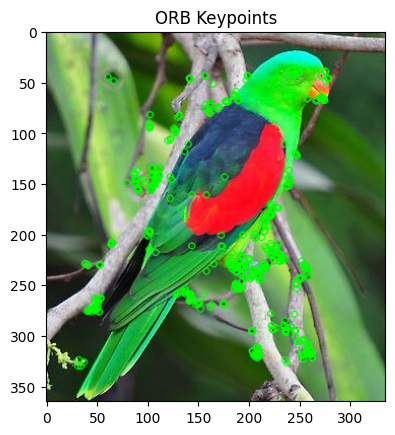

In [ ]:
orb = cv2.ORB_create()
kp, des = orb.detectAndCompute(gray, None)
img_orb = cv2.drawKeypoints(img, kp, None, color=(0,255,0))
plt.imshow(cv2.cvtColor(img_orb, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()